In [ ]:
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


sum(y_pred == y_test) / len(y_test)

#model.predict_proba(X_test)



In [2]:
import als
import alsDataManager
import alsRepeater
import alsLearningManager
import alsRepeaterLauncher

import importlib

importlib.reload(als)
importlib.reload(alsDataManager)
importlib.reload(alsLearningManager)
importlib.reload(alsRepeater)
importlib.reload(alsRepeaterLauncher)
importlib.reload(alsRepeaterLauncher)


from als import ALS
from alsRepeater import AlsRepeater
from alsRepeaterLauncher import AlsRepeaterLauncher


from input.heart_import import get_heart_data

import pandas as pd

import xgboost as xgb
data = get_heart_data()

# converting to np.array removes weird warning
# given from Dmatrix conversion
X = np.array(data.iloc[:,1:])
y = np.array(data.iloc[:,0])

# convert dataset into an optimized data structure
# called Dmatrix that XGBoost supports
# and gives it acclaimed performance
# and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)


heart data import succesful


In [ ]:
def modelfit(model, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


In [11]:
import xgboost as xgb
data = get_heart_data()

# converting to np.array removes weird warning
# given from Dmatrix conversion
X = np.array(data.iloc[:,1:])
y = np.array(data.iloc[:,0])

# convert dataset into an optimized data structure
# called Dmatrix that XGBoost supports
# and gives it acclaimed performance
# and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)

heart data import succesful


In [7]:
"""
COMMON TUNING PARAMETERS

learning_rate:
step size shrinkage used to prevent overfitting.
Range is [0,1]

max_depth: 
determines how deeply each tree
is allowed to grow during any boosting round.

subsample: 
percentage of samples used per tree.
Low value can lead to underfitting.

colsample_bytree: 
percentage of features used per tree.
High value can lead to overfitting.

n_estimators: 
number of trees you want to build.

objective: 
determines the loss function
to be used like reg:linear for regression problems,
reg:logistic for classification problems
with only decision, binary:logistic for
classification problems with probability.

####
Regularization parameters
to penalize models as they become more complex


gamma: 
controls whether a given node will split
based on the expected reduction in loss
after the split. A higher value leads
to fewer splits. Supported only for tree-based learners.
alpha: L1 regularization on leaf weights.
A large value leads to more regularization.
lambda: L2 regularization on leaf weights
and is smoother than L1 regularization.
"""

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: has_disease, Length: 303, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


sum(y_pred == y_test) / len(y_test)

#model.predict_proba(X_test)



0.7868852459016393

In [33]:
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

XGBoostError: Invalid Parameter format for colsample_bytree expect float but value='[0.3, 0.4, 0.5, 0.7]'

In [32]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.377277
Name: test-rmse-mean, dtype: float64


In [13]:
d = alsDataManager.open_dict_from_json('non_bayesian_keep_threshold_ads_10_rep.txt')



In [14]:
keys1 = list(d.keys())
keys2 = list(d[keys1[0]].keys())
keys3 = list(d[keys1[0]][keys2[0]].keys())
keys4 = list(d[keys1[0]][keys2[0]][keys3[0]].keys())

In [15]:
keys4

['accuracy', 'consistencies', 'similar_uncertainties', 'max_uncertainties']

In [9]:
new_keys = []
for key in d.keys():
    new_keys.append('_'.join(key.split('_')[2:]))

In [10]:
d.keys()

dict_keys(['learning_method_random', 'learning_method_uncertainty', 'learning_method_similar', 'learning_method_similar_uncertainty_optimization'])

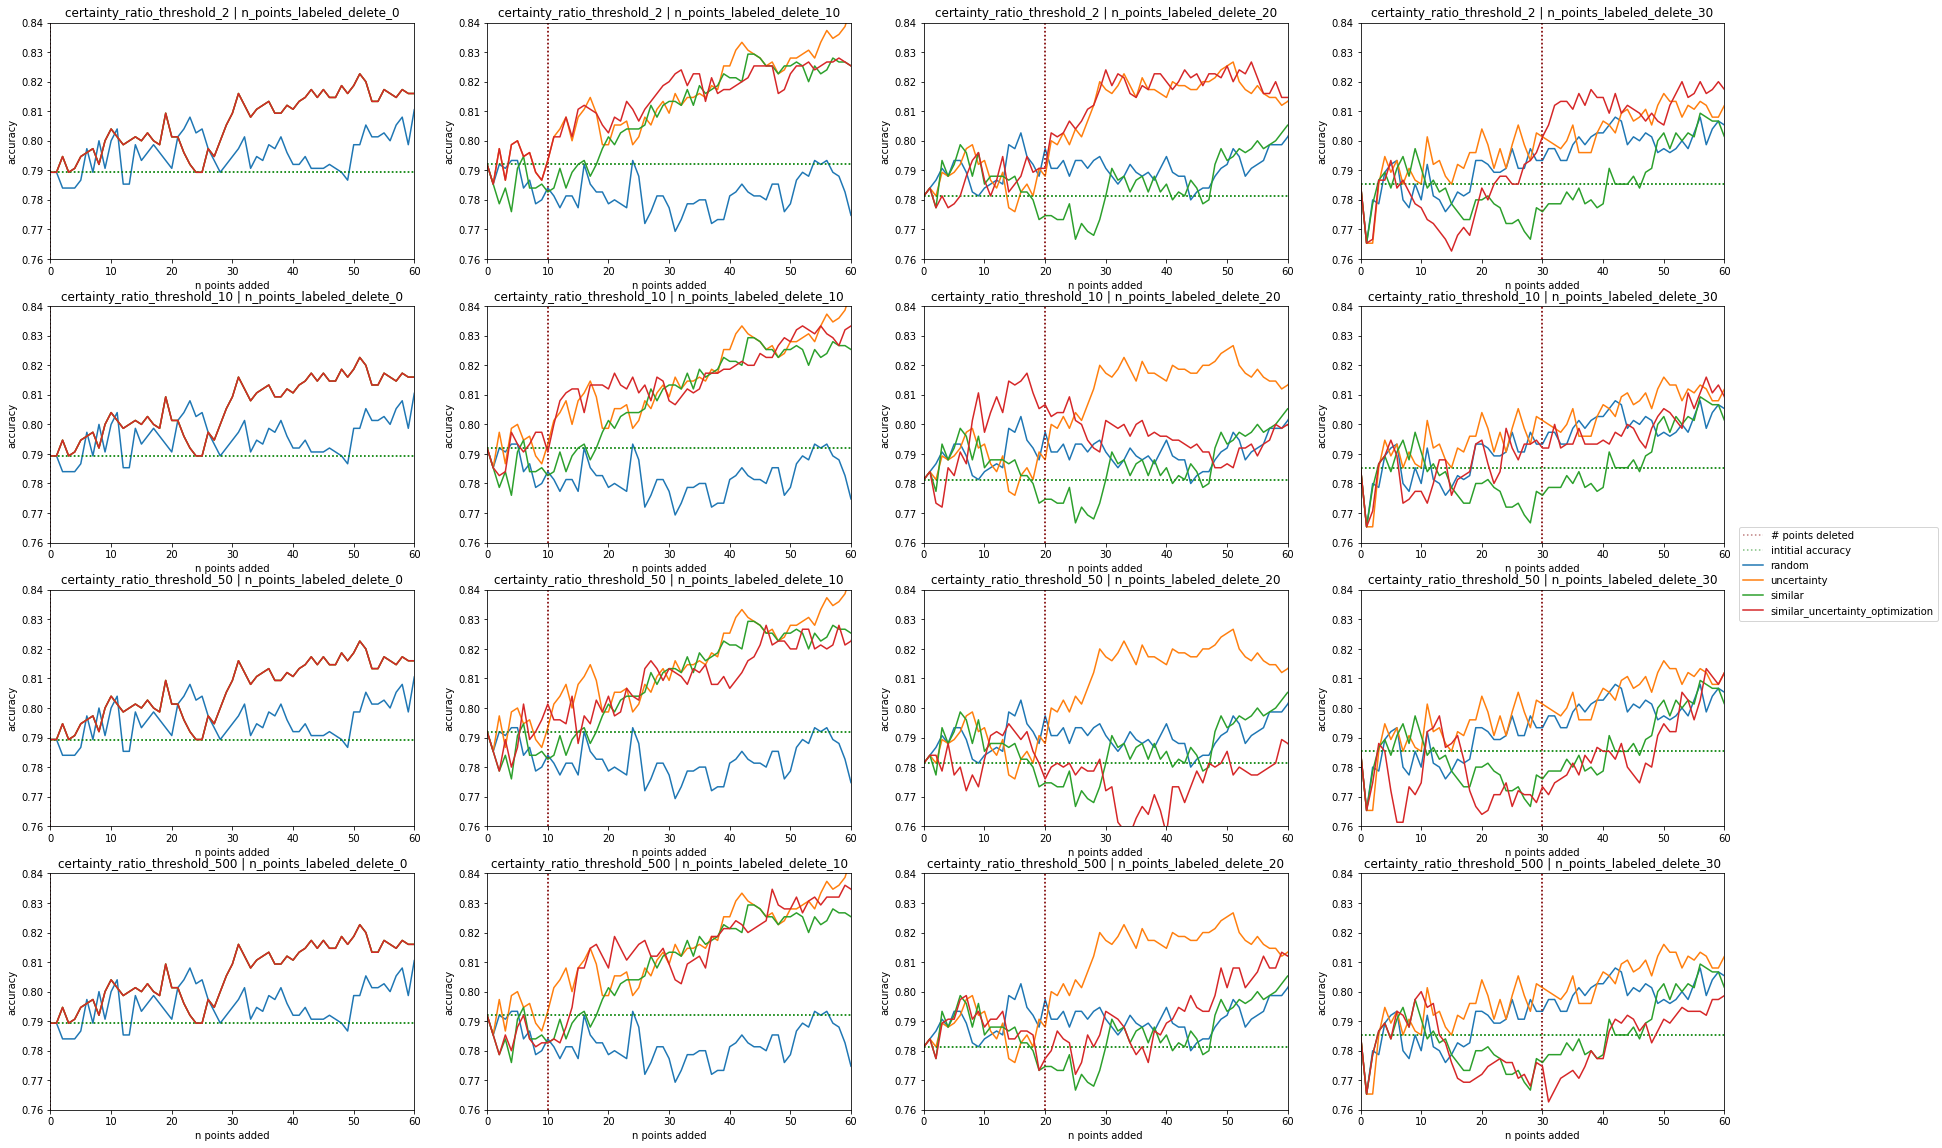

In [11]:
import matplotlib.pyplot as plt
import alsDataManager

json_path = 'non_bayesian_thresholding.txt'
save_path_name = json_path.split('.')[0] + '.png'

d = alsDataManager.open_dict_from_json(json_path)

"""
@param d : dictionary of experiment result data
    first key: learning_method
    second key:
"""

keys1 = list(d.keys())  # assumed to be learning methods
keys2 = list(d[keys1[0]].keys())  # assumed to be row variation
keys3 = list(d[keys1[0]][keys2[0]].keys())  # assumed to be column variation
keys4 = list(d[keys1[0]][keys2[0]][keys3[0]].keys())  # assumed to be performance metrics

n_rows = len(keys2)
n_cols = len(keys3)
methods = keys1
metric = 'accuracy'  # keys4[0]
max_x = 60
max_y = 0.84
min_y = 0.76

fig, axs = plt.subplots(n_rows, n_cols)  # sharex=True, sharey=True)
fig.set_size_inches(30, 20)

for i in range(n_rows):
    for j in range(n_cols):
        grid_element_initialized = False
        for method in methods:
            if not grid_element_initialized:
                if 'delete' in keys2[0]:
                    n_deleted = int(keys2[i].split('_')[-1])  # get the number of deleted by splitting str
                elif 'delete' in keys3[0]:
                    n_deleted = int(keys3[j].split('_')[-1])  # get the number of deleted by splitting str
                else:
                    n_deleted = 0  # TODO: alter this to be input parameter to plotting function
                
                axs[i, j].set_xlim(0, max_x)
                axs[i, j].set_ylim(min_y, max_y)


                axs[i, j].axvline(x=n_deleted,
                                  color='maroon',
                                  alpha=0.5,
                                  label='# points deleted',
                                  linestyle = 'dotted')

                axs[i, j].axhline(y=d[method][keys2[i]][keys3[j]][metric][0],
                                  color='green',
                                  alpha=0.5,
                                  label='intitial ' + metric,
                                  linestyle = 'dotted')

            axs[i, j].plot(d[method][keys2[i]][keys3[j]][metric],
                           # color=method_colors[method],
                           label='_'.join(method.split('_')[2:]))

        title = keys2[i] + ' | ' + keys3[j]

        axs[i, j].set_title(title)



# iterates over all subplots:
for ax in axs.flat:
    ax.set(xlabel='n points added', ylabel=metric)
    #ax.grid()
# ax.label_outer()  # hides x labels and tick labels for top plots and y ticks for right plots.

handles, labels = axs[0, 0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='center right')

#title_string = 'Dataset: ' + dataset_str + ', repetitions per keep-delete pair: ' + str(
#    reps) + ', minutes run time: ' + str(run_time)
#fig.suptitle(title_string)

#fig.legend()
fig.savefig(save_path_name, dpi=200)


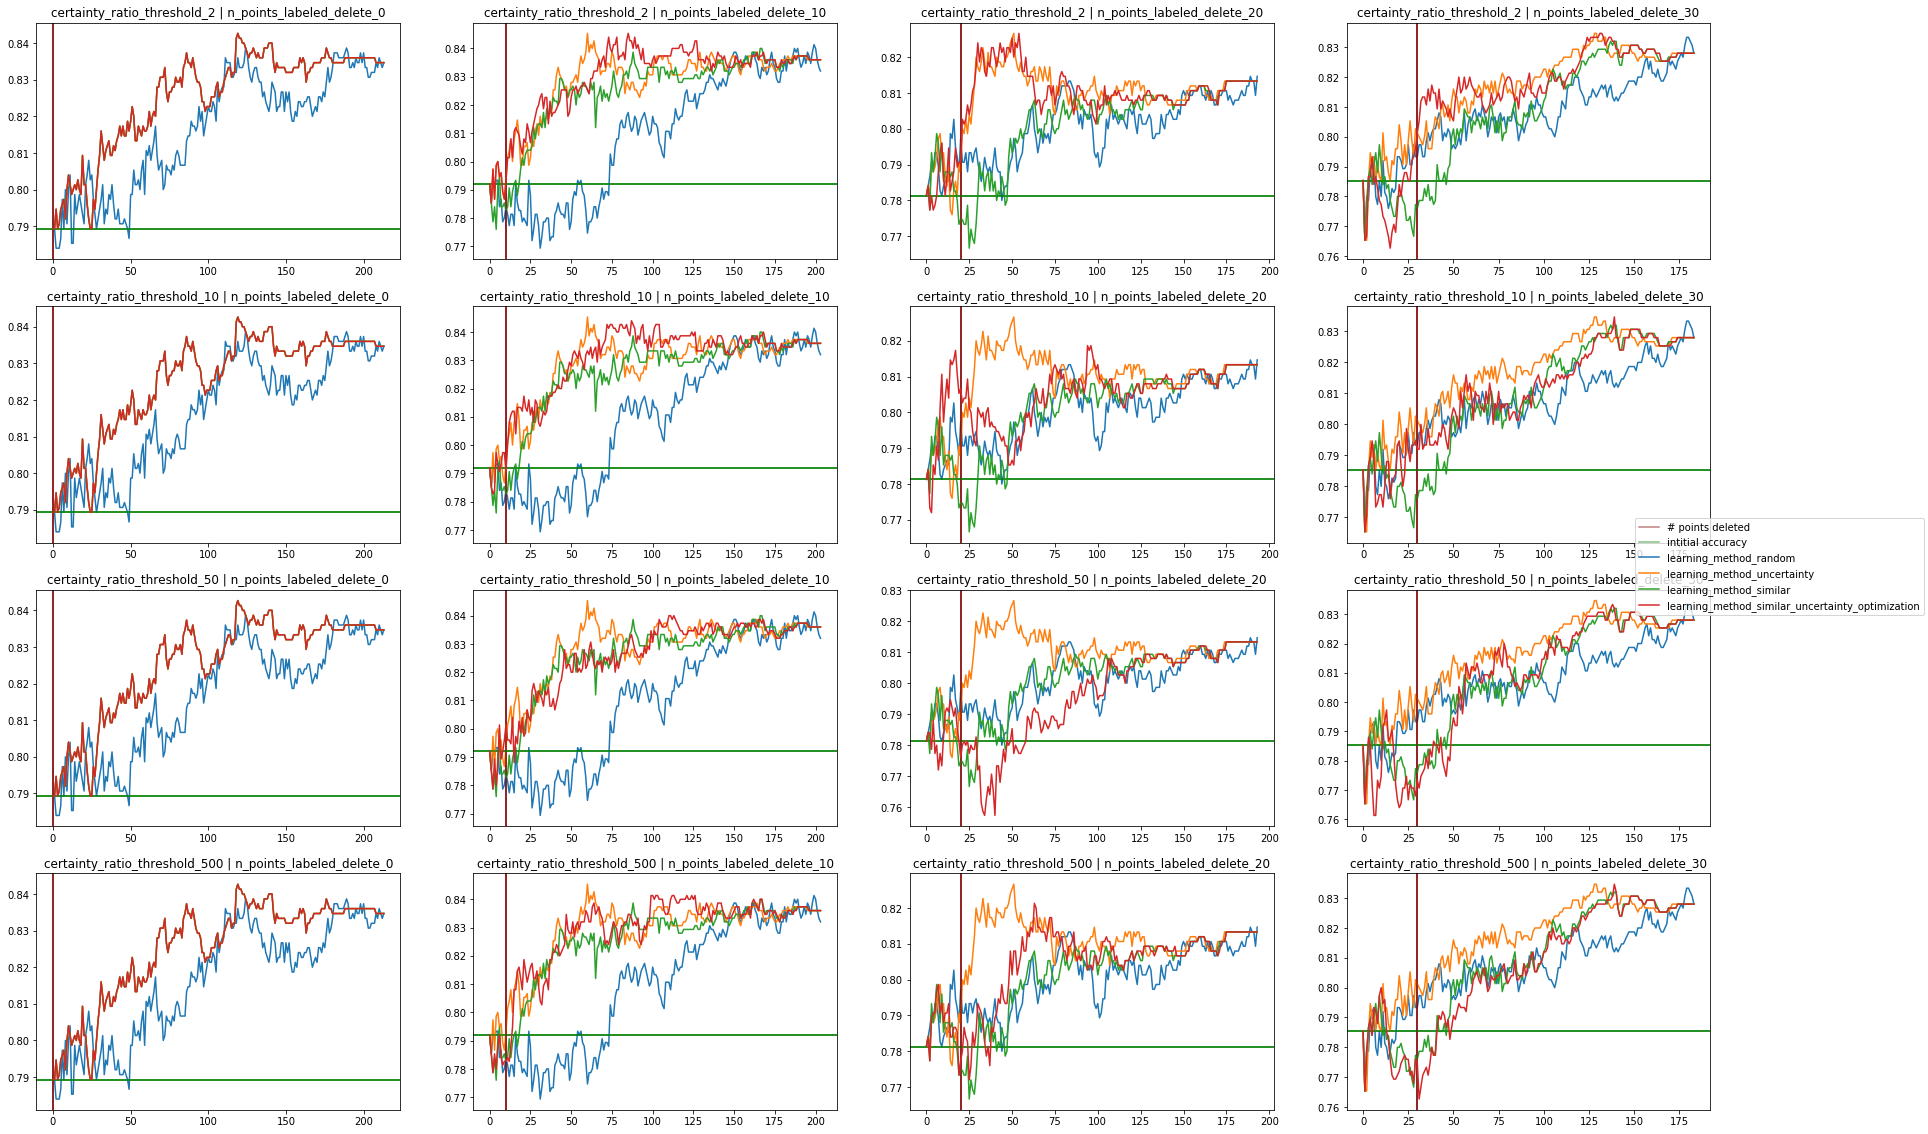

In [12]:

import matplotlib.pyplot as plt
import alsDataManager

keys1 = list(d.keys())  # assumed to be learning methods
keys2 = list(d[keys1[0]].keys())  # assumed to be row variation
keys3 = list(d[keys1[0]][keys2[0]].keys())  # assumed to be column variation
keys4 = list(d[keys1[0]][keys2[0]][keys3[0]].keys()) # assumed to be performance metrics

n_rows = len(keys2)
n_cols = len(keys3)
methods = keys1
metric = 'accuracy'  #keys4[0]

fig, axs = plt.subplots(n_rows, n_cols)  # sharex=True, sharey=True)
fig.set_size_inches(30, 20)

for i in range(n_rows):
    for j in range(n_cols):
        grid_element_initialized = False
        for method in methods:
            if not grid_element_initialized:
                if 'delete' in keys2[0]:
                    n_deleted = int(keys2[i].split('_')[-1])  # get the number of deleted by splitting str
                elif 'delete' in keys3[0]:
                    n_deleted = int(keys3[j].split('_')[-1])  # get the number of deleted by splitting str
                else:
                    n_deleted = 0  # TODO: alter this to be input parameter to plotting function

                axs[i, j].axvline(x=n_deleted,
                                  color='maroon',
                                  alpha=0.5,
                                  label='# points deleted')

                axs[i, j].axhline(y=d[method][keys2[i]][keys3[j]][metric][0],
                                  color='green',
                                  alpha=0.5,
                                  label='intitial ' + metric)

            axs[i, j].plot(d[method][keys2[i]][keys3[j]][metric],
                           # color=method_colors[method],
                           label=method)



        title = keys2[i] + ' | ' + keys3[j]

        axs[i, j].set_title(title)

# iterates over all subplots:
#for ax in axs.flat:
#    ax.set(xlabel='n points added', ylabel=metric)
#    ax.grid()
    # ax.label_outer()  # hides x labels and tick labels for top plots and y ticks for right plots.
    
handles, labels = axs[0, 0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='center right')



In [33]:
by_label

{'# points deleted': <matplotlib.lines.Line2D at 0x1336f9f40>,
 'intitial accuracy': <matplotlib.lines.Line2D at 0x1337101c0>,
 'learning_method_random': <matplotlib.lines.Line2D at 0x1336f93d0>,
 'learning_method_uncertainty': <matplotlib.lines.Line2D at 0x1336f9ee0>,
 'learning_method_similar': <matplotlib.lines.Line2D at 0x1336f9e20>,
 'learning_method_similar_uncertainty_optimization': <matplotlib.lines.Line2D at 0x133705970>}

In [ ]:
from input.heart_import import get_heart_data
from alsRepeaterLauncher import AlsRepeaterLauncher
import alsDataManager


data = get_heart_data()
launcher = AlsRepeaterLauncher()

launcher.input_dict['unsplit_data'] = data
launcher.reps = 1

argument_value_dict = {}
argument_value_dict['learning_method'] = ['random', 'uncertainty']
argument_value_dict['n_points_labeled_keep'] = [10, 20]

results = launcher.run_2_dimensional_varied_reps(argument_value_dict)

json_path = 'results.txt'

alsDataManager.save_dict_as_json(results, json_path)

In [13]:
argument_str = 'learning_method'
argument_value_range = ['random', 'uncertainty']
results = l.run_varied_reps(argument_str, argument_value_range)

[Current learning_method random] [pct complete: 0%]
[Current learning_method random] [pct complete: 25%]
[Current learning_method random] [pct complete: 50%]
[Current learning_method random] [pct complete: 75%]
[Current learning_method uncertainty] [pct complete: 0%]
[Current learning_method uncertainty] [pct complete: 25%]
[Current learning_method uncertainty] [pct complete: 50%]
[Current learning_method uncertainty] [pct complete: 75%]


In [2]:
argument_value_dict = {}
argument_value_dict['learning_method'] = ['random', 'uncertainty']
argument_value_dict['n_points_labeled_keep'] = [10, 20]

results = l.run_2_dimensional_varied_reps(argument_value_dict)

[Current learning_method random] [pct complete: 0%]
[Current learning_method random] [pct complete: 25%]
[Current learning_method random] [pct complete: 50%]
[Current learning_method random] [pct complete: 75%]
[Current learning_method random] [pct complete: 0%]
[Current learning_method random] [pct complete: 25%]
[Current learning_method random] [pct complete: 50%]
[Current learning_method random] [pct complete: 75%]
[Current learning_method uncertainty] [pct complete: 0%]
[Current learning_method uncertainty] [pct complete: 25%]
[Current learning_method uncertainty] [pct complete: 50%]
[Current learning_method uncertainty] [pct complete: 75%]
[Current learning_method uncertainty] [pct complete: 0%]
[Current learning_method uncertainty] [pct complete: 25%]
[Current learning_method uncertainty] [pct complete: 50%]
[Current learning_method uncertainty] [pct complete: 75%]


In [27]:
for key in results:
    for subkey in results[key]:
        for subsubkey in results[key][subkey]:
            print(results[key][subkey][subsubkey])

learning_method_random n_points_labeled_keep_10
[0.70666667 0.6        0.69333333 0.68       0.66666667 0.68
 0.69333333 0.74666667 0.74666667 0.74666667 0.76       0.73333333
 0.73333333 0.73333333 0.73333333 0.74666667 0.70666667 0.73333333
 0.76       0.74666667 0.74666667 0.72       0.76       0.77333333
 0.77333333 0.76       0.76       0.78666667 0.78666667 0.77333333
 0.81333333 0.82666667 0.82666667 0.81333333 0.82666667 0.78666667
 0.81333333 0.81333333 0.82666667 0.82666667 0.8        0.8
 0.8        0.8        0.8        0.81333333 0.82666667 0.82666667
 0.82666667 0.82666667 0.82666667 0.82666667 0.82666667 0.82666667
 0.78666667 0.78666667 0.78666667 0.8        0.81333333 0.84
 0.81333333 0.82666667 0.82666667 0.81333333 0.81333333 0.81333333
 0.82666667 0.82666667 0.82666667 0.82666667 0.82666667 0.82666667
 0.82666667 0.82666667 0.84       0.84       0.84       0.84
 0.82666667 0.82666667 0.82666667 0.81333333 0.81333333 0.81333333
 0.81333333 0.81333333 0.82666667 0.84 

In [6]:
output_path = 'data.txt'
output_dict = results
with open(output_path, 'w') as outfile:
    json.dump(output_dict, outfile)

In [11]:
def save_dict_as_json(output_dict, output_path):
    with open(output_path, 'w') as outfile:
        json.dump(output_dict, outfile)
def open_dict_from_json(input_path):
    with open(input_path) as json_file:
        input_dict = json.load(json_file)
    return input_dict

In [7]:
with open(output_path) as json_file:
    input_dict = json.load(json_file)

In [8]:
input_dict

{'learning_method_random': {'n_points_labeled_keep_10': {'accuracy': [0.7066666666666667,
    0.6,
    0.6933333333333334,
    0.68,
    0.6666666666666666,
    0.68,
    0.6933333333333334,
    0.7466666666666667,
    0.7466666666666667,
    0.7466666666666667,
    0.76,
    0.7333333333333333,
    0.7333333333333333,
    0.7333333333333333,
    0.7333333333333333,
    0.7466666666666667,
    0.7066666666666667,
    0.7333333333333333,
    0.76,
    0.7466666666666667,
    0.7466666666666667,
    0.72,
    0.76,
    0.7733333333333333,
    0.7733333333333333,
    0.76,
    0.76,
    0.7866666666666666,
    0.7866666666666666,
    0.7733333333333333,
    0.8133333333333334,
    0.8266666666666667,
    0.8266666666666667,
    0.8133333333333334,
    0.8266666666666667,
    0.7866666666666666,
    0.8133333333333334,
    0.8133333333333334,
    0.8266666666666667,
    0.8266666666666667,
    0.8,
    0.8,
    0.8,
    0.8,
    0.8,
    0.8133333333333334,
    0.8266666666666667,
    0.82

In [3]:
with open("my.json","w") as f:
    json.dump(results,f)

In [ ]:
with open("my.json","w") as f:
    json.dump(d,f)

In [5]:
with open("my.json","w") as f:
    test = json.loads(f)

TypeError: the JSON object must be str, bytes or bytearray, not TextIOWrapper

In [4]:
import json
json.dumps(results)

'{"learning_method_random": {"n_points_labeled_keep_10": {"accuracy": [0.7066666666666667, 0.6, 0.6933333333333334, 0.68, 0.6666666666666666, 0.68, 0.6933333333333334, 0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.76, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7466666666666667, 0.7066666666666667, 0.7333333333333333, 0.76, 0.7466666666666667, 0.7466666666666667, 0.72, 0.76, 0.7733333333333333, 0.7733333333333333, 0.76, 0.76, 0.7866666666666666, 0.7866666666666666, 0.7733333333333333, 0.8133333333333334, 0.8266666666666667, 0.8266666666666667, 0.8133333333333334, 0.8266666666666667, 0.7866666666666666, 0.8133333333333334, 0.8133333333333334, 0.8266666666666667, 0.8266666666666667, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8133333333333334, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.7866666666666666, 0.7866666666666666, 0.786666666

In [122]:
r = alsr.get_mean_results()

In [123]:
r['accuracy']

array([0.78      , 0.62666667, 0.62666667, 0.62666667, 0.69333333,
       0.69333333, 0.7       , 0.7       , 0.7       , 0.7       ,
       0.69333333, 0.68666667, 0.68666667, 0.68666667, 0.68666667,
       0.69333333, 0.69333333, 0.7       , 0.7       , 0.68      ,
       0.68      , 0.68666667, 0.69333333, 0.72      , 0.71333333,
       0.71333333, 0.71333333, 0.71333333, 0.71333333, 0.72666667,
       0.72666667, 0.73333333, 0.73333333, 0.73333333, 0.71333333,
       0.71333333, 0.72      , 0.69333333, 0.72      , 0.71333333,
       0.74666667, 0.78666667, 0.79333333, 0.8       , 0.8       ,
       0.8       , 0.8       , 0.78666667, 0.78      , 0.79333333,
       0.79333333, 0.80666667, 0.80666667, 0.8       , 0.79333333,
       0.8       , 0.80666667, 0.8       , 0.8       , 0.79333333,
       0.82      , 0.82666667, 0.82666667, 0.80666667, 0.78666667,
       0.78666667, 0.79333333, 0.79333333, 0.80666667, 0.79333333,
       0.78666667, 0.77333333, 0.78      , 0.79333333, 0.78666

In [102]:
np.array(r['similar_uncertainties']).mean(0)

array([], dtype=float64)

In [78]:
als = ALS(get_heart_data(), 'random')

heart data import succesful


In [79]:
als.learningManager.run_experiment()

[Current learning_method random] [pct complete: 0%]
[Current learning_method random] [pct complete: 25%]
[Current learning_method random] [pct complete: 50%]
[Current learning_method random] [pct complete: 75%]


In [92]:
r = alsr.get_mean_results()

In [96]:
np.array(r['accuracy']).mean(0)  # '0' gives mean per row

array([0.8       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.57333333, 0.57333333, 0.57333333, 0.57333333,
       0.58666667, 0.58666667, 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.61333333, 0.68      , 0.68      ,
       0.68      , 0.68      , 0.68      , 0.70666667, 0.73333333,
       0.70666667, 0.72      , 0.72      , 0.72      , 0.69333333,
       0.69333333, 0.69333333, 0.65333333, 0.68      , 0.68      ,
       0.74666667, 0.81333333, 0.81333333, 0.81333333, 0.81333333,
       0.81333333, 0.81333333, 0.8       , 0.8       , 0.81333333,
       0.81333333, 0.82666667, 0.82666667, 0.82666667, 0.81333333,
       0.81333333, 0.82666667, 0.81333333, 0.81333333, 0.81333333,
       0.86666667, 0.86666667, 0.86666667, 0.84      , 0.8       ,
       0.8       , 0.8       , 0.81333333, 0.82666667, 0.81333333,
       0.81333333, 0.78666667, 0.81333333, 0.81333333, 0.8    

In [73]:
d['b']  = als.accuracies
list(d.keys())

['a', 'b']

In [67]:
als.consistencies

[0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6133333333333333,
 0.6133333333333333,
 0.6133333333333333,
 0.6133333333333333,
 0.6266666666666667,
 0.6266666666666667,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.68,
 0.7466666666666667,
 0.7466666666666667,
 0.7466666666666667,
 0.7466666666666667,
 0.7466666666666667,
 0.8,
 0.8266666666666667,
 0.7733333333333333,
 0.84,
 0.84,
 0.84,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8,
 0.8,
 0.8,
 0.8933333333333333,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.

In [64]:
d = {}
d['a'] = list(range(5))

In [40]:
alsr = AlsRepeater()
alsr.als_arguments

3


{'unsplit_data': None,
 'learning_method': None,
 'model_type': 'lr',
 'seed': 0,
 'n_points_labeled_keep': 25,
 'n_points_labeled_delete': 25,
 'use_pca': False,
 'scale': False,
 'n_points_to_add_at_a_time': 1,
 'certainty_ratio_threshold': 2,
 'pct_unlabeled_to_label': 1.0,
 'pct_points_test': 0.25,
 'cores': 4}

In [34]:
data = get_heart_data()

heart data import succesful


In [42]:
len(ALS.__init__.__code__.co_varnames[1:])

13

In [43]:
len(ALS.__init__.__defaults__)

11

In [35]:
values = [data, 'random']
values.extend(ALS.__init__.__defaults__)
arguments = ALS.__init__.__code__.co_varnames[1:]
als_arguments = dict(zip(arguments, values))
als_arguments

{'unsplit_data':      has_disease  age  sex  trestbps  chol  fbs  restecg  thalach  exang  \
 0              1   63    1       145   233    1        0      150      0   
 1              1   37    1       130   250    0        1      187      0   
 2              1   41    0       130   204    0        0      172      0   
 3              1   56    1       120   236    0        1      178      0   
 4              1   57    0       120   354    0        1      163      1   
 ..           ...  ...  ...       ...   ...  ...      ...      ...    ...   
 298            0   57    0       140   241    0        1      123      1   
 299            0   45    1       110   264    0        1      132      0   
 300            0   68    1       144   193    1        1      141      0   
 301            0   57    1       130   131    0        1      115      1   
 302            0   57    0       130   236    0        0      174      0   
 
      oldpeak  ca  cp_1  cp_2  cp_3  thal_1  thal_2  thal_

In [36]:
als = ALS(**als_arguments)

In [37]:
als.dataManager.get_partitions()

{'labeled_keep':      has_disease  age  sex  trestbps  chol  fbs  restecg  thalach  exang  \
 225            0   70    1       145   174    0        1      125      1   
 152            1   64    1       170   227    0        0      155      0   
 228            0   59    1       170   288    0        0      159      0   
 201            0   60    1       125   258    0        0      141      1   
 52             1   62    1       130   231    0        1      146      0   
 245            0   48    1       124   274    0        0      166      0   
 175            0   40    1       110   167    0        0      114      1   
 168            0   63    1       130   254    0        0      147      0   
 223            0   56    0       200   288    1        0      133      1   
 217            0   63    1       130   330    1        0      132      1   
 111            1   57    1       150   126    1        1      173      0   
 135            1   49    0       130   269    0        1   

In [13]:
arguments = ALS.__init__.__code__.co_varnames[1:]
#values = [None] * len(arguments)
values = range(0, len(arguments))
als_arguments = dict(zip(arguments, values))
als_arguments

{'unsplit_data': 0,
 'learning_method': 1,
 'model_type': 2,
 'seed': 3,
 'n_points_labeled_keep': 4,
 'n_points_labeled_delete': 5,
 'use_pca': 6,
 'scale': 7,
 'n_points_to_add_at_a_time': 8,
 'certainty_ratio_threshold': 9,
 'pct_unlabeled_to_label': 10,
 'pct_points_test': 11,
 'cores': 12}

In [20]:
[a for a in als_arguments.values()]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [80]:
als.learningManager.run_experiment()

[Current learning_method random] [pct complete: 0%]
[Current learning_method random] [pct complete: 25%]
[Current learning_method random] [pct complete: 50%]
[Current learning_method random] [pct complete: 75%]


In [43]:
als.accuracies

[0.8,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.5733333333333334,
 0.5733333333333334,
 0.5733333333333334,
 0.5733333333333334,
 0.5866666666666667,
 0.5866666666666667,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6133333333333333,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.7066666666666667,
 0.7333333333333333,
 0.7066666666666667,
 0.72,
 0.72,
 0.72,
 0.6933333333333334,
 0.6933333333333334,
 0.6933333333333334,
 0.6533333333333333,
 0.68,
 0.68,
 0.7466666666666667,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8,
 0.8,
 0.8133333333333334,
 0.8133333333333334,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8133333333333334,
 0.8133333333333334,
 0.8266666666666667,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.84,
 0.8,
 0.8,
 0.8,
 0.8133333333333334,
 0.8266666666666667,
 0.8133333333333334,

In [2]:
strs = ['a', 'b', 'c']

In [3]:
d = {}
for st in strs:
    d[st] = []
d

{'a': [], 'b': [], 'c': []}

In [5]:
len(d.keys())

3

In [7]:
d = {}
d['a'] = [1, 0]
d['b'] = [1, 0]
d['c'] = [1, 0]
d

{'a': [1, 0], 'b': [1, 0], 'c': [1, 0]}

In [28]:
def itererate_lists(d, printstr = ""):
    if len(d.keys()) == 1:
        current_key = str(list(d.keys())[0])
        for value in d[current_key]:
            print(printstr + current_key + str(value))
    else:
        for key in d:
            d_except_key = d.copy()
            d_except_key.pop(key)
            itererate_lists(d_except_key, printstr + key)
    

In [29]:
itererate_lists(d)

abc1
abc0
acb1
acb0
bac1
bac0
bca1
bca0
cab1
cab0
cba1
cba0
